### WTH预测

In [25]:
from exp.exp_informer import Exp_Informer
from informer_paddle.wth_args import get_wth_args_nb

args = get_wth_args_nb()
setting = "2024-09-12_05_07_informer_WTH_small_M_prob_timeF_0"
exp = Exp_Informer(args)

🔣 args:{'model': 'informer', 'data': 'WTH_small', 'root_path': 'd:/data/', 'data_path': 'WTH_small.csv', 'features': 'M', 'target': 'WetBulbCelsius', 'freq': 'h', 'checkpoints': 'd:/checkpoints/', 'seq_len': 96, 'label_len': 48, 'pred_len': 24, 'enc_in': 12, 'dec_in': 12, 'c_out': 12, 'd_model': 512, 'n_heads': 8, 'e_layers': 2, 'd_layers': 1, 's_layers': '3,2,1', 'd_ff': 2048, 'factor': 5, 'padding': 0, 'distil': True, 'dropout': 0.05, 'attn': 'prob', 'embed': 'timeF', 'activation': 'gelu', 'output_attention': True, 'mix': True, 'num_workers': 0, 'itr': 1, 'train_epochs': 6, 'batch_size': 32, 'patience': 4, 'learning_rate': 0.0001, 'des': 'test', 'loss': 'mse', 'lradj': 'type1', 'use_amp': False, 'inverse': False, 'use_gpu': False, 'gpu': 0, 'use_multi_gpu': False, 'devices': '0,1,2,3', 'detail_freq': 'h'}
🏿Use CPU:Place(cpu)


In [26]:
exp.predict(setting, True)
print('end🔚...')
# np.savetxt(folder_path + 'real_prediction.csv', preds, delimiter=',')

📑_get_data处理结束,flag:【pred】,data_set.length:【1】
end🔚...


### 读取已保存数据

In [46]:
import numpy as np

prediction = np.load('./results/' + setting + '/real_prediction.npy')
print(prediction.shape)
print(prediction)

(1, 24, 12)
[[[ 0.11151735  0.5239005   0.7285444   0.73549575  0.86318326
    1.1081814   0.13960853 -0.06356836 -0.13312942  1.3823127
    1.391337    0.8663302 ]
  [ 0.22176863  0.4483221   0.6010547   0.8343339   1.1678872
    1.2059277   0.25353563 -0.10000015 -0.1269709   1.4544126
    1.4286461   0.9258672 ]
  [ 0.22666547  0.41376624  0.56661785  0.8500439   1.171688
    1.1819221   0.3033405  -0.1260909  -0.13773875  1.4839901
    1.4566085   0.87538487]
  [ 0.26921308  0.4669658   0.5898614   0.8049309   1.0535349
    1.1564478   0.2115715  -0.12455655 -0.1802196   1.4804724
    1.4725027   0.85224557]
  [ 0.2679863   0.44743368  0.5598535   0.78785855  1.0398707
    1.1466173   0.23110746 -0.14450373 -0.18678202  1.4558605
    1.4644059   0.82437885]
  [ 0.2829493   0.40932584  0.5195665   0.77076614  1.0436002
    1.1301252   0.26286456 -0.15583457 -0.20040213  1.4357482
    1.472067    0.8015626 ]
  [ 0.2940795   0.71681273  0.8388396   0.8839046   0.8736302
    1.0437533 

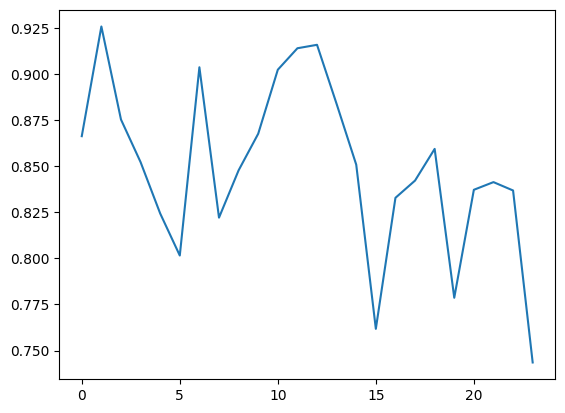

In [47]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(prediction[0, :, -1])
plt.show()

### More details about Prediction - prediction function

📑_get_data处理结束,flag:【pred】,data_set.length:【1】
预测原始数据:(1, 24, 12)
预测展示数据:(24,)


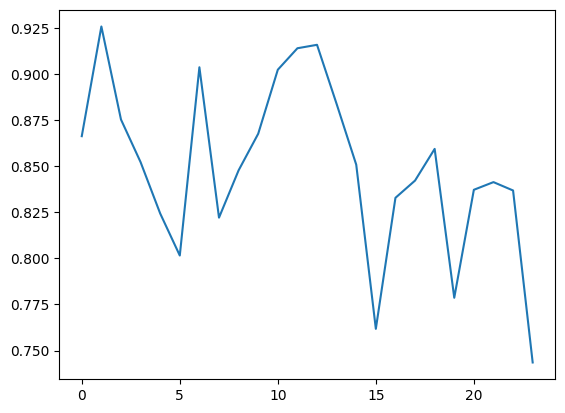

In [44]:
from informer_paddle.prediction import predict

prediction = predict(exp, setting, True)

print(f'预测原始数据:{prediction.shape}')
plt.figure()
# [0,:] 选择第一个维度的所有元素
# [-1] 选择最后一个维度的最后一个元素
prediction = prediction[0, :, -1]
print(f'预测展示数据:{prediction.shape}')
plt.plot(prediction)
plt.show()

### More details about Prediction - prediction dataset

可以指定需要预测的数据的 `root_path` 和 `data_path`，并像设置其他 Dataset 一样设置 `seq_len`、`label_len`、`pred_len` 等参数。不同的是，可以设置更详细的频率，例如 `15min` 或 `3h`，来生成预测序列的时间戳。

`Dataset_Pred` 只有一个样本（包括 `encoder_input: [1, seq_len, dim]`, `decoder_token: [1, label_len, dim]`, `encoder_input_timestamp: [1, seq_len, date_dim]`, `decoder_input_timstamp: [1, label_len+pred_len, date_dim]`）。它会截取给定数据的最后一个序列（seq_len 数据），以预测未来看不见的序列（pred_len 数据）。

In [30]:
from data_loader.data_loader import Dataset_Pred
from paddle.io import DataLoader

In [43]:
timeenc = 0 if args.embed != 'timeF' else 1
flag = 'pred'
shuffle_flag = False
drop_last = False
batch_size = 1
freq = args.detail_freq

data_set = Dataset_Pred(
    root_path=args.root_path,
    data_path=args.data_path,
    flag=flag,
    size=[args.seq_len, args.label_len, args.pred_len],
    features=args.features,
    target=args.target,
    timeenc=timeenc,
    freq=freq
)
data_loader = DataLoader(
    data_set,
    batch_size=batch_size,
    shuffle=shuffle_flag,
    num_workers=args.num_workers,
    drop_last=drop_last)
len(data_set), len(data_loader)

(1, 1)

### 当我们完成exp.train(setting)和exp.test(setting)后，我们将得到训练好的模型和测试实验的结果
- `./results/{setting}/pred.npy`（测试数据集的预测）
- `./results/{setting}/true.npy`（测试数据集的真实值）

In [34]:
preds = np.load('./results/' + setting + '/pred.npy')
trues = np.load('./results/' + setting + '/true.npy')
preds.shape, trues.shape

((3040, 24, 12), (3040, 24, 12))

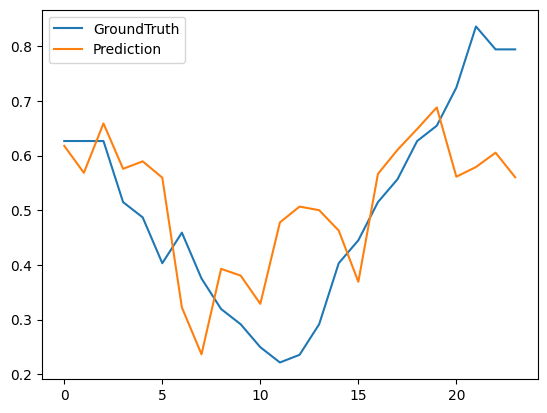

In [37]:
import matplotlib.pyplot as plt

# import seaborn as sns

# draw OT prediction
plt.figure()
plt.plot(trues[0, :, -1], label='GroundTruth')
plt.plot(preds[0, :, -1], label='Prediction')
plt.legend()
plt.show()

tures.shape:(3040, 24, 12)
preds.shape:(3040, 24, 12)
[[[ 0.34961504  1.1294463   1.1221167  ... -0.46853146 -0.4706901
    0.6266908 ]
  [ 0.34961504  1.1294463   1.1221167  ... -0.5753375  -0.5518882
    0.6266908 ]
  [ 0.34961504  1.1294463   1.1221167  ... -0.41512844 -0.43009105
    0.6266908 ]
  ...
  [ 0.34961504  1.241899    1.2239581  ... -0.30832237 -0.30829388
    0.83627   ]
  [ 0.34961504  1.241899    1.2239581  ... -0.30832237 -0.30829388
    0.79435414]
  [ 0.34961504  1.241899    1.2239581  ... -0.30832237 -0.30829388
    0.79435414]]

 [[ 0.34961504  1.1294463   1.1221167  ... -0.5753375  -0.5518882
    0.6266908 ]
  [ 0.34961504  1.1294463   1.1221167  ... -0.41512844 -0.43009105
    0.6266908 ]
  [ 0.34961504  0.90454054  0.9184339  ... -0.41512844 -0.43009105
    0.5149152 ]
  ...
  [ 0.34961504  1.241899    1.2239581  ... -0.30832237 -0.30829388
    0.79435414]
  [ 0.34961504  1.241899    1.2239581  ... -0.30832237 -0.30829388
    0.79435414]
  [ 0.34961504  1.2418

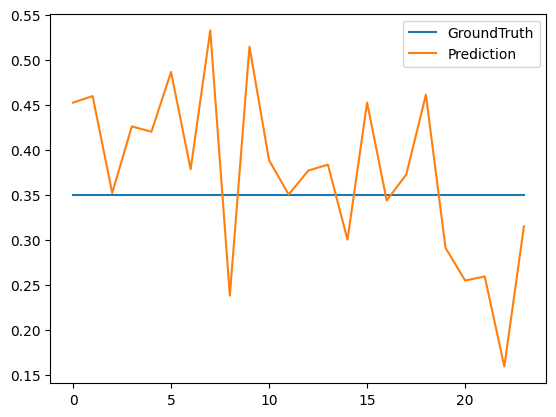

In [41]:
# draw HUFL prediction
plt.figure()
print(f"tures.shape:{preds.shape}")
print(f"preds.shape:{preds.shape}")
plt.plot(trues[0, :, 0], label='GroundTruth')
plt.plot(preds[0, :, 0], label='Prediction')
plt.legend()
plt.show()